<a href="https://colab.research.google.com/github/komalaftab/kaggle_Competitions/blob/master/Diaster_tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import libraries**

In [0]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re


In [0]:
# loading data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [29]:
# head method shows first five rows
train_data.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In target column :

*   label 1 represent real diaster tweets
*   label 0 represent fake diaster tweets



In [30]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [31]:
print(train_data.shape)
print(test_data.shape)

(7613, 5)
(3263, 4)


**check missing values**

In [32]:
train_data.isnull().sum()# missing values in train data set

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [33]:
test_data.isnull().sum() # checking missing value in test data set

id             0
keyword       26
location    1105
text           0
dtype: int64

**how many real and fake diaster tweets in train data set? **

In [34]:
a = train_data["target"].value_counts()
a

0    4342
1    3271
Name: target, dtype: int64

**Visulaze  data throug Graphic represtenation**

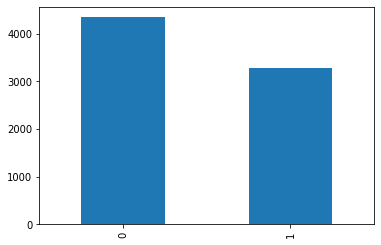

In [35]:
a.plot(kind ="bar")

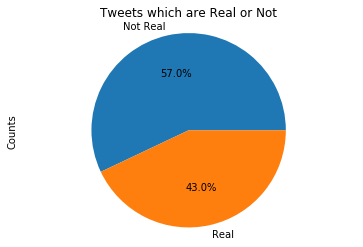

In [36]:
real = len(train_data[train_data["target"] == 1])
fake = len(train_data[train_data["target"] == 0])

df_count_pie = pd.DataFrame({'Class' : ['Real', 'Not Real'], 
                             'Counts' : [real, fake]})
df_count_pie.Counts.groupby(df_count_pie.Class).sum().plot(kind='pie',autopct = '%1.1f%%')
plt.axis('equal')
plt.title("Tweets which are Real or Not")
plt.show()

**Preprocessing NLP**

**Preprocessing the text data in the train and test dataset.**

In [37]:
train_data["text"][:3]

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
Name: text, dtype: object

*The above output shows the text column which needs pre-processing like convert the words to lowercase, remove puntuations and stopwords, tokenize the text to words.*

**Removing Punctuation**

In [0]:
# Removing punctuations from trian data
data1=train_data.iloc[:,3]
data1.replace("[^a-zA-Z]"," ",regex=True, inplace=True)


In [0]:
# Removing punctuations from test data
data2=test_data.iloc[:,3]
data2.replace("[^a-zA-Z]"," ",regex=True, inplace=True)


In [40]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are ...,1
3,6,NaN,NaN,people receive wildfires evacuation or...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as ...,1


In [41]:
train_data["text"][:3] # train_data after removing punctuation

0    Our Deeds are the Reason of this  earthquake M...
1               Forest fire near La Ronge Sask  Canada
2    All residents asked to  shelter in place  are ...
Name: text, dtype: object

**changing all tweets into lowercase**

In [0]:
# for train dat
train_data['text'] = train_data['text'].str.lower()

In [0]:
# for test data
test_data["text"] = test_data["text"].str.lower()

In [44]:
test_data["text"][:3]

0                   just happened a terrible car crash
1    heard about  earthquake is different cities  s...
2    there is a forest fire at spot pond  geese are...
Name: text, dtype: object

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

**implement Bag of word**

*For train data*

In [0]:
countvector=CountVectorizer(ngram_range=(1,1))
traindata=countvector.fit_transform(train_data["text"])

*For test data*

In [0]:
testdata = countvector.transform(test_data["text"])

**Model training**

In [48]:
# implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=250,criterion='entropy')
randomclassifier.fit(traindata,train_data['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Predication for the test_dataset**

In [0]:
predictions = randomclassifier.predict(testdata)

In [0]:
output = pd.DataFrame({'id': test_data.id, 'target': predictions})

In [51]:
output.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


**saving_submission_file**

In [52]:
output.to_csv('tweets_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
